In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC


In [20]:
df = pd.read_csv(r"C:\Users\deepu\Downloads\AI_Resume_Screening_After_Preprocessing.csv")
df.head()


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",1.640557,B.Sc,NaN,0,0,1.080895,0.887684,0.765286
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",1.640557,MBA,Google ML,2,0,1.432808,-1.279664,0.765286
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",-1.252275,MBA,Deep Learning Specialization,1,0,-0.357187,0.578063,-0.665155
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",0.676280,B.Tech,AWS Certified,0,0,-1.438840,-1.589285,0.526879
4,5,Julie Hill,"SQL, React, Java",-0.287997,PhD,NaN,3,0,0.323242,1.197305,0.765286


In [23]:
y = df['Job Role']  
X = df.drop(['Job Role', 'Resume_ID', 'Name'], axis=1)

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7892976588628763
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.80      0.92      0.86        77
           2       0.73      0.58      0.65        76
           3       0.82      0.78      0.80        69

    accuracy                           0.79       299
   macro avg       0.79      0.79      0.78       299
weighted avg       0.79      0.79      0.78       299



In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9966555183946488
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        76
           3       1.00      0.99      0.99        69

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.4013377926421405
              precision    recall  f1-score   support

           0       0.40      0.58      0.47        77
           1       0.48      0.62      0.54        77
           2       0.29      0.18      0.22        76
           3       0.36      0.19      0.25        69

    accuracy                           0.40       299
   macro avg       0.38      0.40      0.37       299
weighted avg       0.38      0.40      0.37       299



In [29]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.44816053511705684
              precision    recall  f1-score   support

           0       0.45      0.81      0.58        77
           1       0.50      0.74      0.60        77
           2       0.27      0.16      0.20        76
           3       0.75      0.04      0.08        69

    accuracy                           0.45       299
   macro avg       0.49      0.44      0.36       299
weighted avg       0.49      0.45      0.37       299



In [30]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.391304347826087
              precision    recall  f1-score   support

           0       0.44      0.70      0.54        77
           1       0.47      0.62      0.54        77
           2       0.25      0.17      0.20        76
           3       0.08      0.03      0.04        69

    accuracy                           0.39       299
   macro avg       0.31      0.38      0.33       299
weighted avg       0.32      0.39      0.34       299



In [31]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9966555183946488
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        76
           3       1.00      0.99      0.99        69

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



In [32]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))


AdaBoost Accuracy: 0.6020066889632107
              precision    recall  f1-score   support

           0       0.51      0.86      0.64        77
           1       0.58      1.00      0.73        77
           2       1.00      0.24      0.38        76
           3       1.00      0.28      0.43        69

    accuracy                           0.60       299
   macro avg       0.77      0.59      0.55       299
weighted avg       0.77      0.60      0.55       299



In [33]:
models = ['Random Forest','Decision Tree','KNN','SVM','Logistic Regression','Gradient Boosting','AdaBoost']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_ab)
]

comparison = pd.DataFrame({'Model':models,'Accuracy':accuracies})
comparison.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
1,Decision Tree,0.996656
5,Gradient Boosting,0.996656
0,Random Forest,0.789298
6,AdaBoost,0.602007
3,SVM,0.448161
2,KNN,0.401338
4,Logistic Regression,0.391304


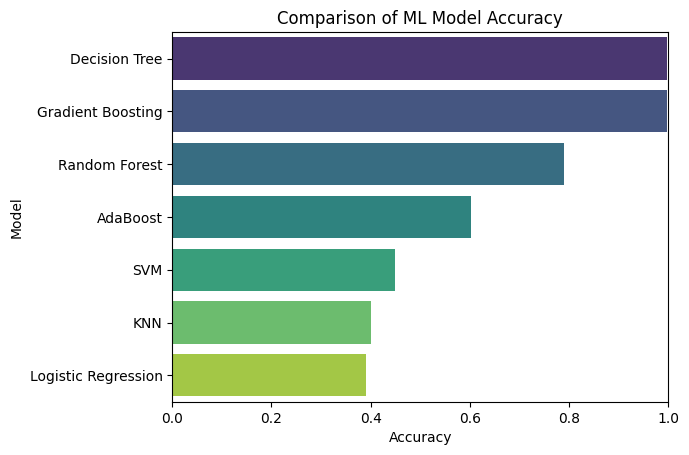

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Gradient Boosting', 'Random Forest', 'AdaBoost', 'SVM', 'KNN', 'Logistic Regression']
accuracy = [0.9967, 0.9967, 0.7893, 0.6020, 0.4482, 0.4013, 0.3913]

accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title("Comparison of ML Model Accuracy")
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


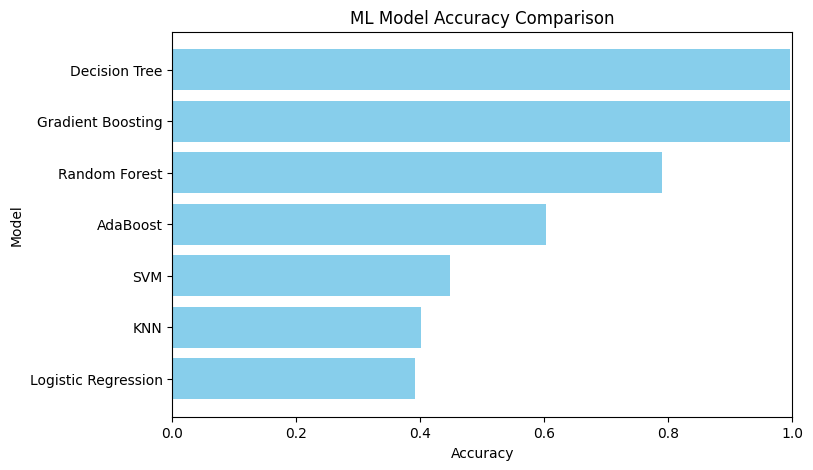

In [36]:
accuracy_df.sort_values('Accuracy', inplace=True)

plt.figure(figsize=(8,5))
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.title("ML Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()


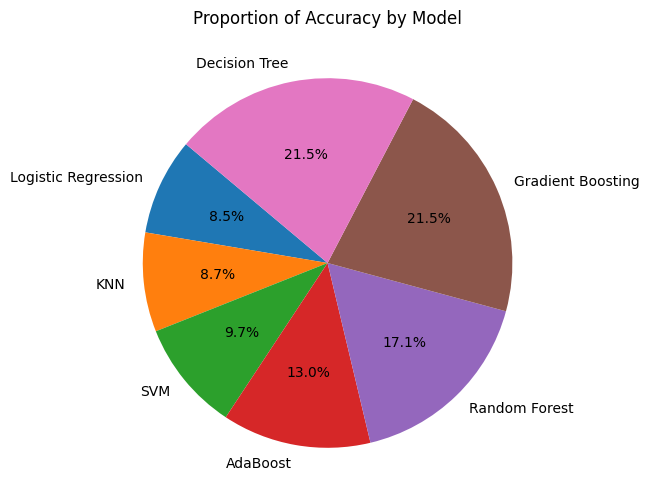

In [37]:
plt.figure(figsize=(6,6))
plt.pie(accuracy_df['Accuracy'], labels=accuracy_df['Model'], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Accuracy by Model")
plt.show()


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

tuned_gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

scores_tuned = cross_val_score(tuned_gb, X, y, cv=5, scoring='accuracy')
print("Tuned Gradient Boosting Cross-Validation Accuracy for each fold:", scores_tuned)
print("Mean Tuned Accuracy:", scores_tuned.mean())


Tuned Gradient Boosting Cross-Validation Accuracy for each fold: [1.         0.99497487 1.         1.         1.        ]
Mean Tuned Accuracy: 0.9989949748743718
